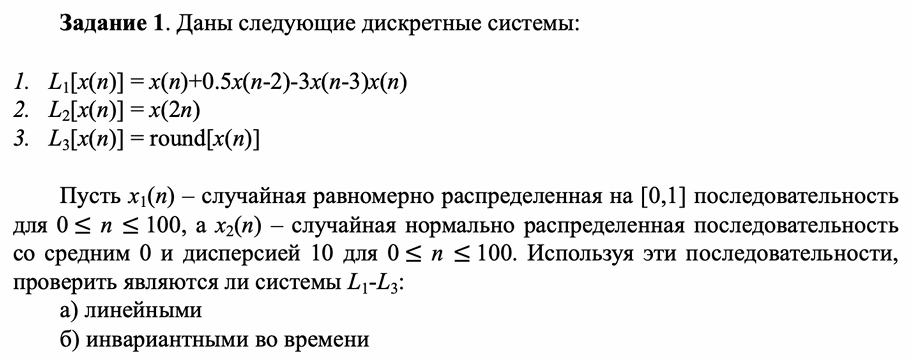

In [1]:
import numpy as np

In [2]:
n = np.arange(0, 101)

x1 = np.random.uniform(0, 1, size=len(n))
x2 = np.random.normal(0, np.sqrt(10), size=len(n))

In [3]:
def L1(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = x[i]
        if i >= 2:
            y[i] += 0.5 * x[i-2]
        if i >= 3:
            y[i] -= 3 * x[i-3] * x[i]
    return y

def L2(x):
    y = np.zeros(len(x) // 2 + len(x) % 2)
    for i in range(len(y)):
        y[i] = x[2 * i]
    return y

def L3(x):
    return np.round(x)

In [4]:
def check_linearity(L, x1, x2, a, b):
    return np.allclose(L(a * x1 + b * x2), a * L(x1) + b * L(x2))

def check_time_invariance(L, x, shift):
    x_shifted = np.zeros_like(x)
    x_shifted[shift:] = x[:-shift]
    y_shifted_input = L(x_shifted)

    y = L(x)
    y_shifted_output = np.zeros_like(y)
    y_shifted_output[shift:] = y[:-shift]

    return np.allclose(y_shifted_input, y_shifted_output)

In [5]:
a = 3.0
b = 7.0

print("Linearity:")
print("L1:", check_linearity(L1, x1, x2, a, b))
print("L2:", check_linearity(L2, x1, x2, a, b))
print("L3:", check_linearity(L3, x1, x2, a, b))

Linearity:
L1: False
L2: True
L3: False


In [6]:
shift = 10

print("Invariance:")
print("L1:", check_time_invariance(L1, x1, shift))
print("L2:", check_time_invariance(L2, x1, shift))
print("L3:", check_time_invariance(L3, x1, shift))

Invariance:
L1: True
L2: False
L3: True
